4. Dataset: Diabetes
- Target: variável alvo é a ocorrência de diabetes (0 = não, 1 = sim)
- Descrição: O dataset contém informações de 8 variáveis de diagnóstico médico de pacientes mulheres da tribo Pima. O objetivo é prever se a paciente tem diabetes a partir das informações.
- Exercício: Crie um modelo de classificação para prever a variável alvo utilizando MultinomialNB e avalie o desempenho usando validação cruzada com 5 folds. Depois, repita o processo utilizando LogisticRegression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv("pima_indians_diabetes_database.csv")

In [3]:
X = diabetes[list(set(diabetes.columns) - set(["Outcome"]))]
y = diabetes["Outcome"]

In [4]:
# Separando em conjunto de treino e validação
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando em conjunto de teste e validação
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [5]:
# Criando os modelos
nb = MultinomialNB()
lr = LogisticRegression(max_iter=10000, random_state=1032)

In [6]:
# Aplicando validação cruzada 10-fold para o modelo Multinomial Naive Bayes
scores_nb = cross_val_score(nb, X_train, y_train, cv=5)

# Aplicando validação cruzada 10-fold para o modelo Logistic Regression
scores_lr = cross_val_score(lr, X_train, y_train, cv=5)

# Imprimindo os resultados
print("Validação Cruzada 10-fold para Multinomial Naive Bayes: ")
print("Acurácia média: {:.2f}".format(scores_nb.mean()))
print("Desvio padrão: {:.2f}".format(scores_nb.std()))
print("\n")
print("Validação Cruzada 10-fold para Logistic Regression: ")
print("Acurácia média: {:.2f}".format(scores_lr.mean()))
print("Desvio padrão: {:.2f}".format(scores_lr.std()))

Validação Cruzada 10-fold para Multinomial Naive Bayes: 
Acurácia média: 0.61
Desvio padrão: 0.07


Validação Cruzada 10-fold para Logistic Regression: 
Acurácia média: 0.77
Desvio padrão: 0.03


In [7]:
# Treinando e ajustando os modelos com o conjunto de treino
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Fazendo as previsões nos conjuntos de teste e validação
y_pred_test_nb = nb.predict(X_test)
y_pred_test_lr = lr.predict(X_test)
y_pred_val_nb = nb.predict(X_val)
y_pred_val_lr = lr.predict(X_val)

# Imprimindo as métricas de classificação para os modelos no conjunto de teste
print("Métricas de classificação para Multinomial Naive Bayes no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_nb))
print("\n")
print("Métricas de classificação para Logistic Regression no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_lr))

Métricas de classificação para Multinomial Naive Bayes no conjunto de teste: 
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        52
           1       0.48      0.52      0.50        25

    accuracy                           0.66        77
   macro avg       0.62      0.63      0.62        77
weighted avg       0.67      0.66      0.67        77



Métricas de classificação para Logistic Regression no conjunto de teste: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        52
           1       0.64      0.64      0.64        25

    accuracy                           0.77        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.77      0.77      0.77        77



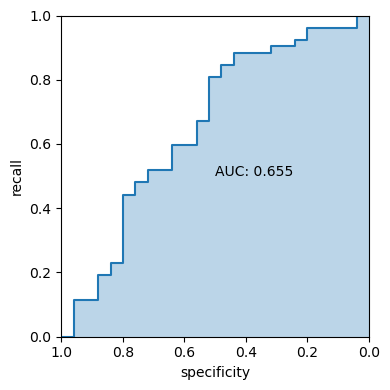

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

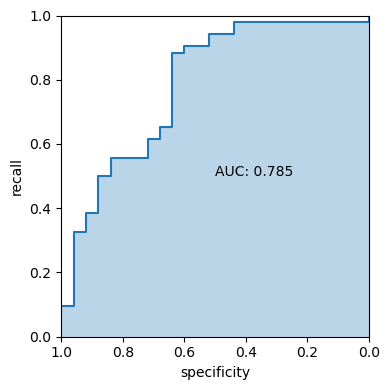

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()